In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_data_set.csv")

In [ ]:
# Explore the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [ ]:
data.iloc[100:166,:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
100,LP001345,Male,Yes,2,Not Graduate,No,4288,3263.0,133.0,180.0,1.0,Urban,Y
101,LP001349,Male,No,0,Graduate,No,4843,3806.0,151.0,360.0,1.0,Semiurban,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,LP001562,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N
162,LP001565,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,Semiurban,N
163,LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
164,LP001572,Male,Yes,0,Graduate,No,9323,0.0,75.0,180.0,1.0,Urban,Y


In [ ]:
x =data.isnull().sum()
x

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.shape

(614, 13)

In [ ]:
data['Property_Area'].describe()

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [ ]:
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [ ]:
df=data['Property_Area'].value_counts().reset_index()

In [ ]:
df.columns=['Area ','count']

In [ ]:
df

,Area,count
0,Semiurban,233
1,Urban,202
2,Rural,179


In [ ]:
data['ApplicantIncome'][data['Gender']=="Male"].mean()

5446.460122699386

In [ ]:
data['Property_Area'][data['Loan_Status']=='Y'].value_counts()

Semiurban    179
Urban        133
Rural        110
Name: Property_Area, dtype: int64

In [ ]:
data['Property_Area'][data['Loan_Status']=='N'].value_counts()

Rural        69
Urban        69
Semiurban    54
Name: Property_Area, dtype: int64

In [ ]:
data.groupby('Gender')['Property_Area'].value_counts()

Gender  Property_Area
Female  Semiurban         55
        Urban             33
        Rural             24
Male    Semiurban        172
        Urban            166
        Rural            151
Name: Property_Area, dtype: int64

In [ ]:
data.groupby('Gender')['ApplicantIncome'].mean()

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

In [ ]:
%matplotlib inline

In [ ]:
df=data.groupby('Gender')['ApplicantIncome'].mean()

Number of applicants income who has taken loan


<Axes: xlabel='Gender'>

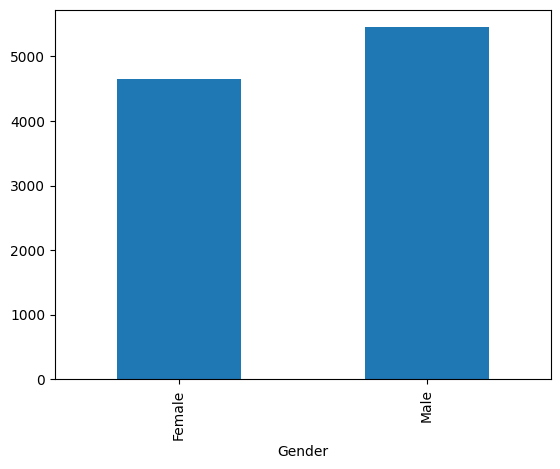

In [ ]:
print("Number of applicants income who has taken loan")
df.plot(kind='bar')

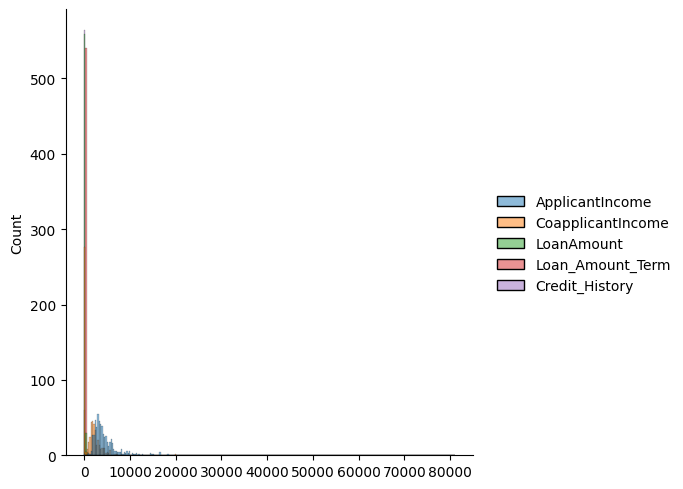

In [ ]:
sns.displot(data)

<Axes: >

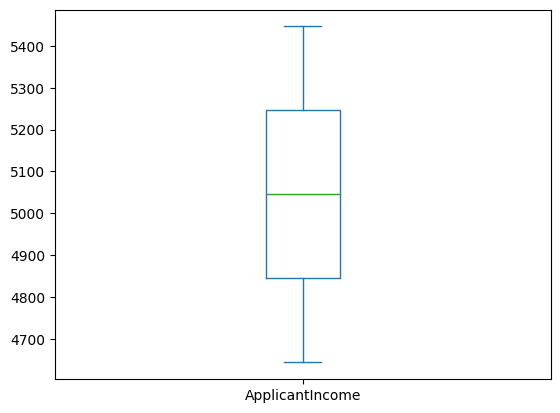

In [ ]:
df.plot.box()

Number of people who took loan by gender
Male      489
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

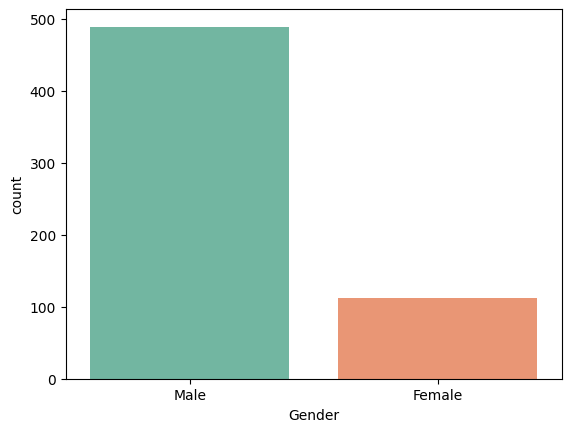

In [ ]:
print("Number of people who took loan by gender")
print(data['Gender'].value_counts())
sns.countplot(x='Gender',data=data,palette='Set2')

In [ ]:
data.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

<Axes: >

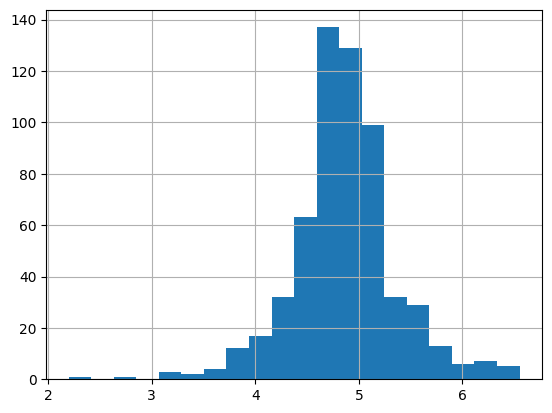

In [ ]:
data['LoanAmount_log']=np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())
data.LoanAmount_log=data.LoanAmount_log.fillna(data.LoanAmount_log.mean())

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109


In [ ]:
data.groupby('Gender').agg({'ApplicantIncome':['sum','mean'],'CoapplicantIncome':['sum','mean']})

ApplicantIncome              CoapplicantIncome             
                   sum         mean               sum         mean
Gender                                                            
Female          520069  4643.473214     124097.000000  1108.008929
Male           2797655  5573.017928     871347.919989  1735.752829

In [ ]:
data[['Loan_Status','Credit_History']].value_counts()

Loan_Status  Credit_History
Y            1.0               415
N            1.0               110
             0.0                82
Y            0.0                 7
dtype: int64

In [ ]:
pd.crosstab(index=data['Loan_Status'], columns=['Credit_History'])

col_0,Credit_History
Loan_Status,
N,192
Y,422


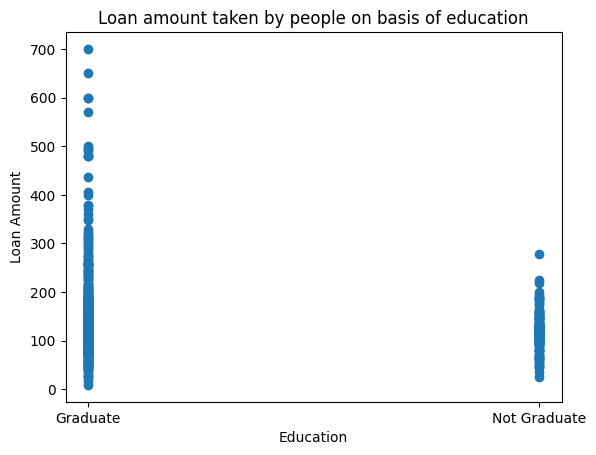

In [ ]:
plt.title('Loan amount taken by people on basis of education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.scatter(data['Education'],data['LoanAmount'])

<Axes: xlabel='Dependents', ylabel='Count'>

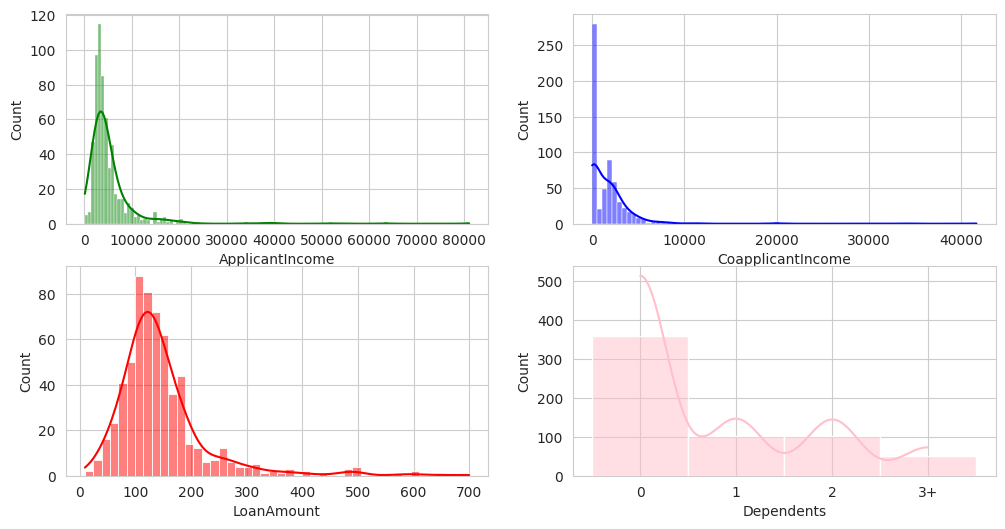

In [ ]:
sns.set_style("whitegrid")
fig,axs=plt.subplots(2,2,figsize=(12,6))
sns.histplot(data=data,x='ApplicantIncome',kde=True,color='green',ax=axs[0,0])
sns.histplot(data=data,x='CoapplicantIncome',kde=True,color='blue',ax=axs[0,1])
sns.histplot(data=data,x='LoanAmount',kde=True,color='red',ax=axs[1,0])
sns.histplot(data=data,x="Dependents",kde=True,color='pink',ax=axs[1,1])

<Axes: xlabel='LoanAmount'>

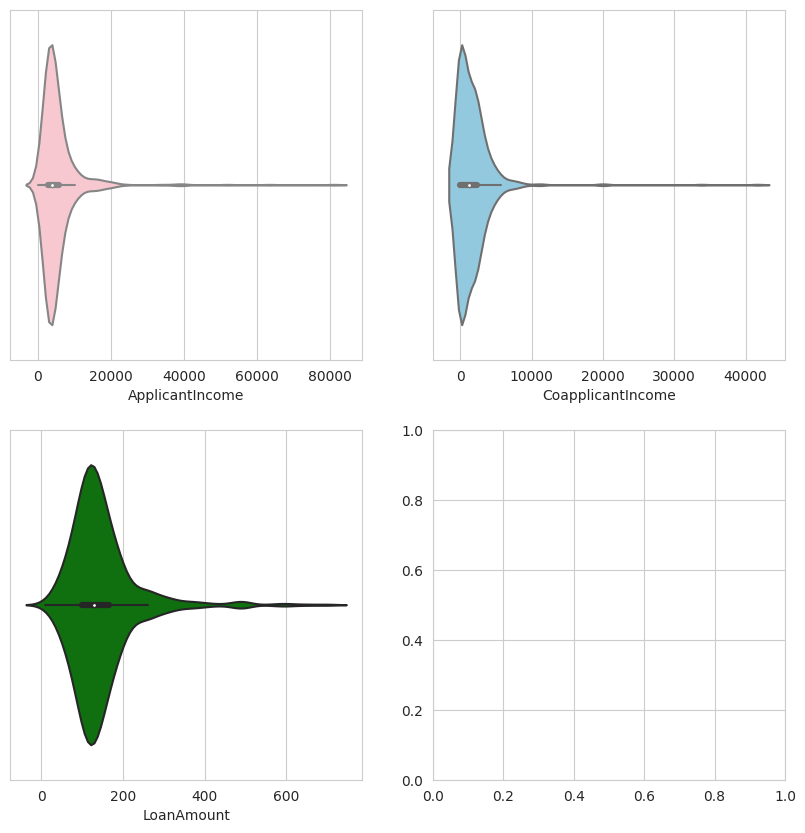

In [ ]:
sns.set_style='white'
fig,axs=plt.subplots(2,2,figsize=(10,10))
sns.violinplot(data=data,x="ApplicantIncome",color='pink',kde=True,ax=axs[0,0])
sns.violinplot(data=data,x="CoapplicantIncome",color='skyblue',kde=True,ax=axs[0,1])
sns.violinplot(data=data,x="LoanAmount",color='green',kde=True,ax=axs[1,0])

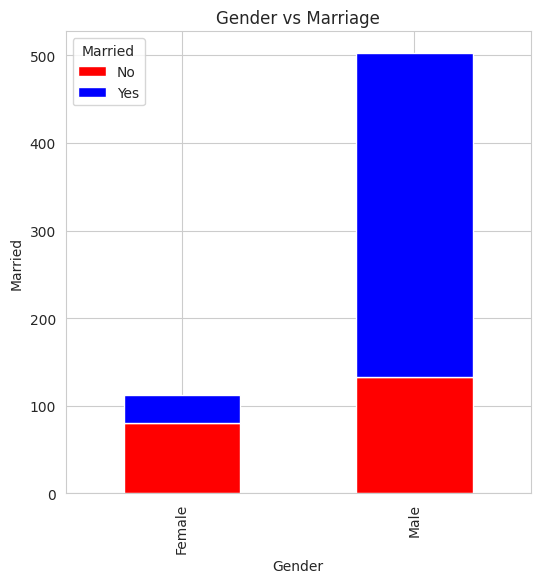

In [ ]:
pd.crosstab(data.Gender,data.Married).plot(kind='bar',stacked=True,figsize=(6,6),color=['red','blue'])
plt.xlabel('Gender')
plt.ylabel('Married')
plt.title('Gender vs Marriage')
plt.show()

Number of people who took loan by Loanamount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

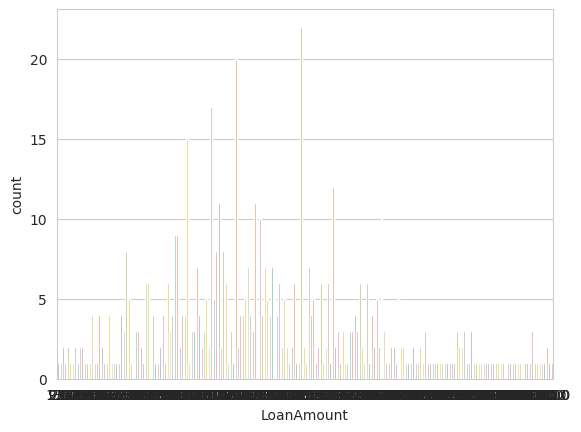

In [ ]:
print("Number of people who took loan by Loanamount")
print(data['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=data,palette='Set2')

Number of people who took loan by CreditHistory
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

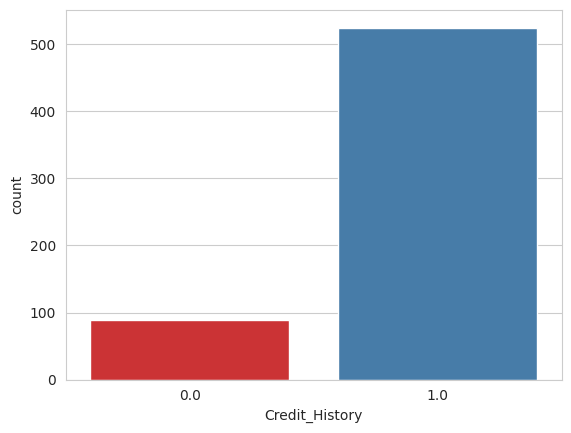

In [ ]:
print("Number of people who took loan by CreditHistory")
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=data,palette='Set1')

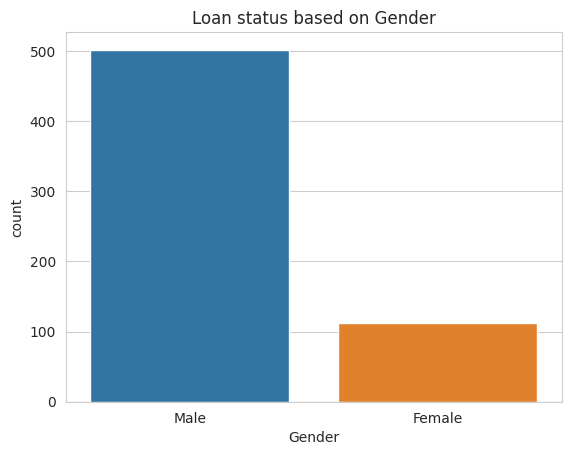

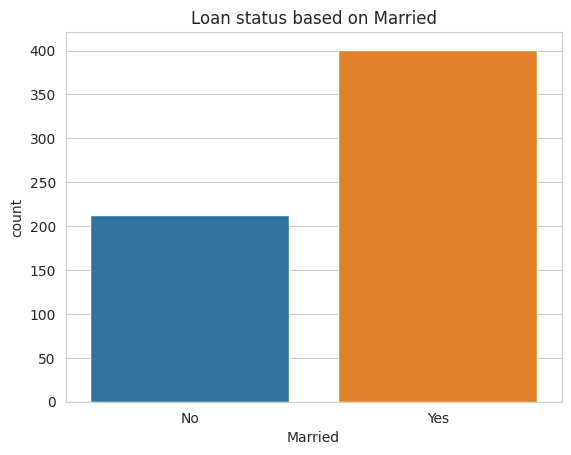

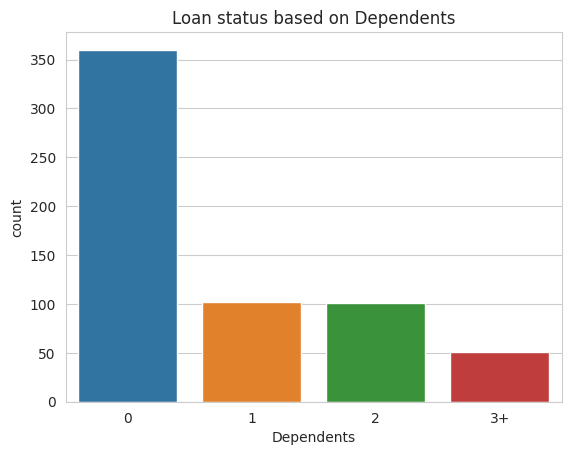

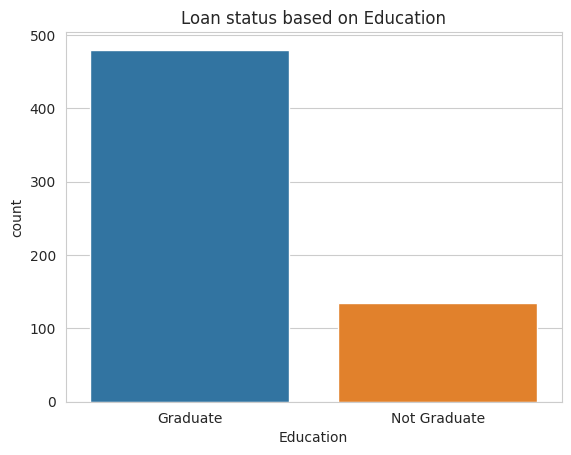

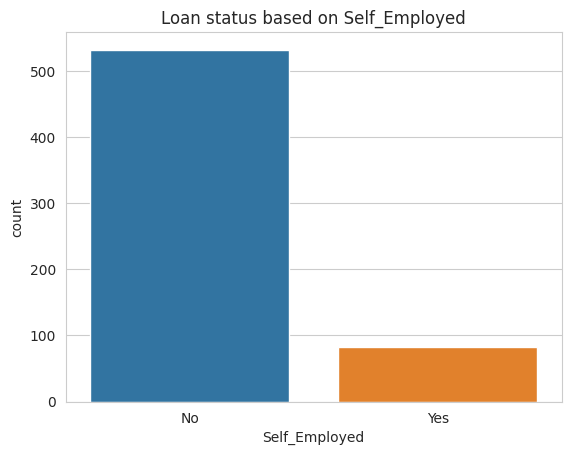

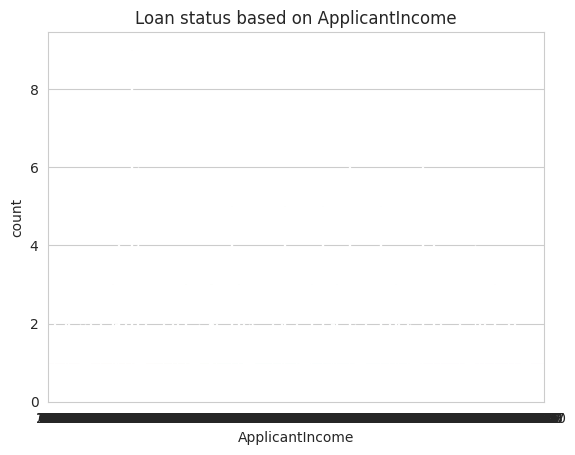

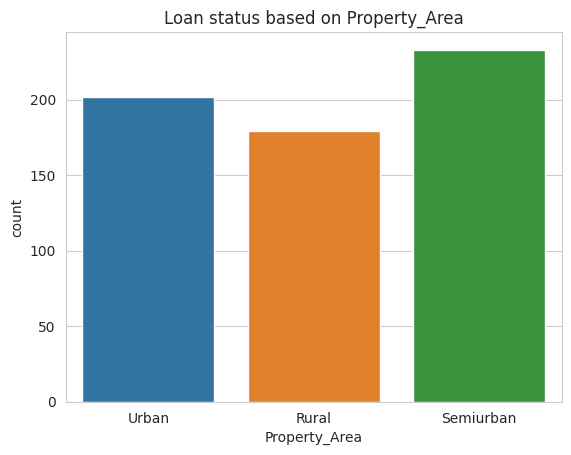

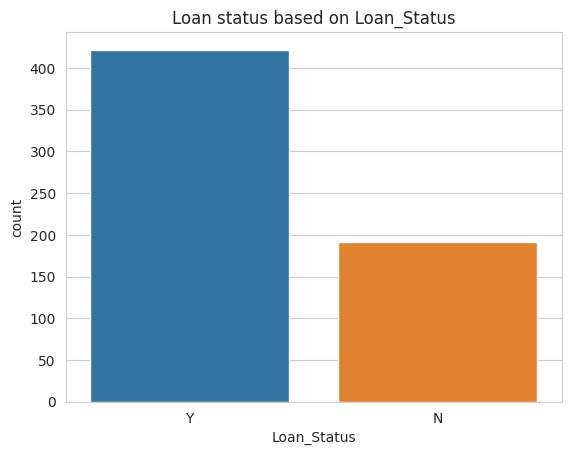

In [ ]:
#Plotting loan status on basis of different parameter
for i in data.columns[1:]:
    if (data[i].dtype == 'object') or (data[i].dtype == 'int64'):
            sns.countplot(data = data, x = i)
            plt.title('Loan status based on {}'.format(i))
            plt.show()

<Axes: >

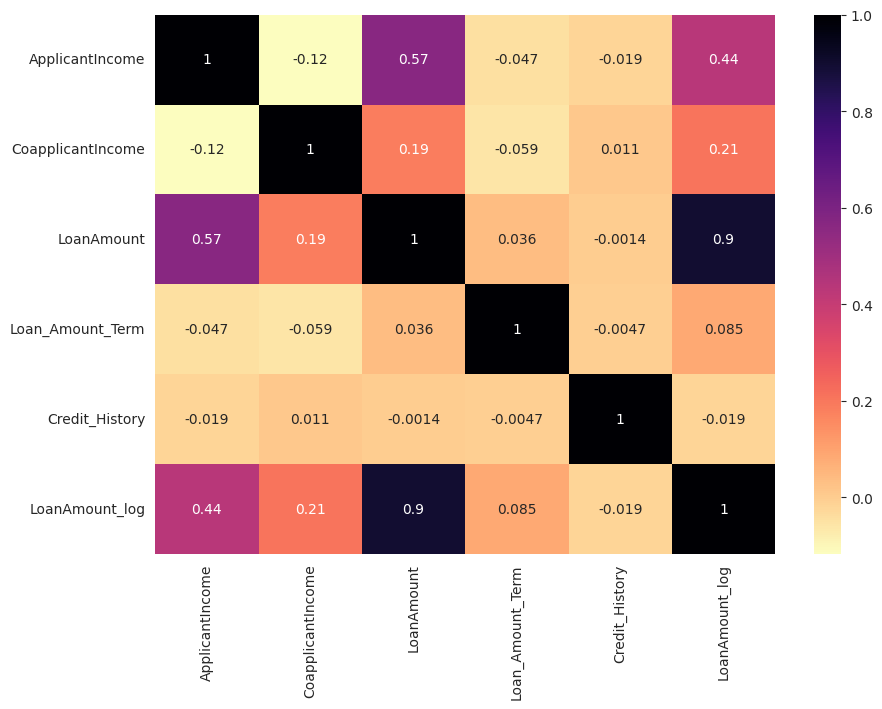

In [ ]:
#Heatmap of Dataset
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='magma_r')

In [ ]:
### label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Loan_ID'] = le.fit_transform(data['Loan_ID'])
data['Gender'] = le.fit_transform(data['Gender'])
data['LoanAmount'] = le.fit_transform(data['LoanAmount'])

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,0,1,No,0,Graduate,No,5849,0.0,100,360.0,1.0,Urban,Y,4.857444
1,1,1,Yes,1,Graduate,No,4583,1508.0,81,360.0,1.0,Rural,N,4.852030
2,2,1,Yes,0,Graduate,Yes,3000,0.0,26,360.0,1.0,Urban,Y,4.189655
3,3,1,Yes,0,Not Graduate,No,2583,2358.0,73,360.0,1.0,Urban,Y,4.787492
4,4,1,No,0,Graduate,No,6000,0.0,94,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,No,0,Graduate,No,2900,0.0,29,360.0,1.0,Rural,Y,4.262680
610,610,1,Yes,3+,Graduate,No,4106,0.0,7,180.0,1.0,Rural,Y,3.688879
611,611,1,Yes,1,Graduate,No,8072,240.0,163,360.0,1.0,Urban,Y,5.533389
612,612,1,Yes,2,Graduate,No,7583,0.0,133,360.0,1.0,Urban,Y,5.231109


In [ ]:
y = data.pop('Married')
x = data

In [ ]:
x

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,0,1,0,Graduate,No,5849,0.0,100,360.0,1.0,Urban,Y,4.857444
1,1,1,1,Graduate,No,4583,1508.0,81,360.0,1.0,Rural,N,4.852030
2,2,1,0,Graduate,Yes,3000,0.0,26,360.0,1.0,Urban,Y,4.189655
3,3,1,0,Not Graduate,No,2583,2358.0,73,360.0,1.0,Urban,Y,4.787492
4,4,1,0,Graduate,No,6000,0.0,94,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,Graduate,No,2900,0.0,29,360.0,1.0,Rural,Y,4.262680
610,610,1,3+,Graduate,No,4106,0.0,7,180.0,1.0,Rural,Y,3.688879
611,611,1,1,Graduate,No,8072,240.0,163,360.0,1.0,Urban,Y,5.533389
612,612,1,2,Graduate,No,7583,0.0,133,360.0,1.0,Urban,Y,5.231109


In [ ]:
y

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [ ]:
x.describe()

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,5403.459283,1621.245798,87.719870,342.410423,0.855049,4.857444
std,177.390811,0.386497,6109.041673,2926.248369,45.670174,64.428629,0.352339,0.495995
min,0.000000,0.000000,150.000000,0.000000,0.000000,12.000000,0.000000,2.197225
25%,153.250000,1.000000,2877.500000,0.000000,53.250000,360.000000,1.000000,4.607658
50%,306.500000,1.000000,3812.500000,1188.500000,82.000000,360.000000,1.000000,4.857444
75%,459.750000,1.000000,5795.000000,2297.250000,116.750000,360.000000,1.000000,5.104426
max,613.000000,1.000000,81000.000000,41667.000000,203.000000,480.000000,1.000000,6.551080


In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.25,random_state=30)

In [ ]:
x_train.shape

(460, 13)

In [ ]:
x_test.shape

(154, 13)

In [ ]:
x.shape

(614, 13)